# **DECISION TREES**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.



---



In this Notebook we are going to see how this algorithm works with a simple example, using the Python library "scikit-learn", especifically the ["Tree" module](https://scikit-learn.org/stable/modules/tree.html). Then we will work with ensembles of trees (Random forest and XGBoost).

First, we are going to import some libraries and functions that we will use:


*   **Numpy**, that allows us to work with arrays
*   The **"Scikit-learn"** library that provides a group of functions related to Decision Trees and dataset splitting
*   **Graphviz**, that will allow us to plot the Decision Trees
* **io**, that allows us to navigate files
*  **Pandas**, that allows us to work with dataframes

In [1]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz
import io
import pandas as pd

## **1. SINGLE TREES**


### **DATA DEFINITION**

In this activity we have a dataset of medical diagnoses based on having some of these five different symptoms, in order:


*   Temperature
*   Sore throat
*   Cough
*   Headache
*   Muscle pain

The possible diagnoses are:


*   Covid
*   Flu
*   Cold
*   Other

Here we have a set of parameters ***(XTrain)*** consisting of five different values (one for each symptom presented previously) where 0 is not having the symptom and 1 is having it. For each set of parameters we have a diagnose ***(yTrain)*** of the previously listed diagnoses. Here we can see a table containing this data:

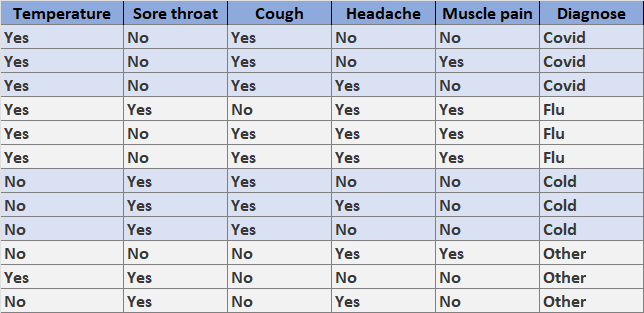




In [2]:
# Parameters of training data
XTrain = np.array([[1, 0, 1, 0, 0], [1, 0, 1, 0, 1], [1, 0, 1, 1, 0],\
                   [1, 1, 0, 1, 1], [1, 0, 1, 1, 1], [1, 0, 1, 1, 1],\
                   [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [0, 1, 1, 0, 0],\
                   [0, 0, 0, 1, 1], [1, 1, 0, 0, 0], [0, 1, 0, 1, 0]])

# Ground truth of training data
yTrain = np.array(["Covid", "Covid", "Covid", "Flu", "Flu", "Flu", "Cold", "Cold", "Cold", "Other", "Other", "Other"])

To start, we have an example of how to create a basic DT using the ["Tree" module](https://scikit-learn.org/stable/modules/tree.html), specifically the **"DecisionTreeClassifier"**. Next, the DT is exported as text and displayed. ***Try changing the criterion to get the information gain (entropy).***

In [3]:
# Fit the classifier
# TO DO: Change the criterion to information gain
clf = tree.DecisionTreeClassifier(criterion='entropy')#_________TO DO__________
clf = clf.fit(XTrain, yTrain)

# Export and print the DT
r = tree.export_text(clf, feature_names=["Temperature", "Sore throat", "Cough", "Headache", "Muscle pain"])
print(r)

|--- Temperature <= 0.50
|   |--- Cough <= 0.50
|   |   |--- class: Other
|   |--- Cough >  0.50
|   |   |--- class: Cold
|--- Temperature >  0.50
|   |--- Headache <= 0.50
|   |   |--- Cough <= 0.50
|   |   |   |--- class: Other
|   |   |--- Cough >  0.50
|   |   |   |--- class: Covid
|   |--- Headache >  0.50
|   |   |--- Muscle pain <= 0.50
|   |   |   |--- class: Covid
|   |   |--- Muscle pain >  0.50
|   |   |   |--- class: Flu



The ["Tree" module](https://scikit-learn.org/stable/modules/tree.html) allows us to plot the tree, as follows:

[Text(0.4090909090909091, 0.875, 'x[0] <= 0.5\nentropy = 2.0\nsamples = 12\nvalue = [3, 3, 3, 3]'),
 Text(0.18181818181818182, 0.625, 'x[2] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 0, 0, 2]'),
 Text(0.29545454545454547, 0.75, 'True  '),
 Text(0.09090909090909091, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]'),
 Text(0.2727272727272727, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0]'),
 Text(0.6363636363636364, 0.625, 'x[3] <= 0.5\nentropy = 1.449\nsamples = 7\nvalue = [0, 3, 3, 1]'),
 Text(0.5227272727272727, 0.75, '  False'),
 Text(0.45454545454545453, 0.375, 'x[2] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 0, 1]'),
 Text(0.36363636363636365, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(0.5454545454545454, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0]'),
 Text(0.8181818181818182, 0.375, 'x[4] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3, 0]'),
 Text(0.7272727272727273, 0.125, 'entropy = 0.0\nsamples = 1

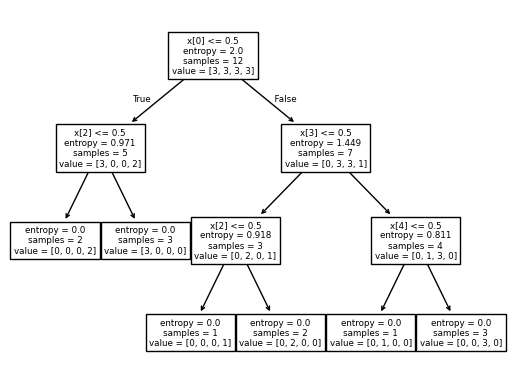

In [4]:
# Plot the decision tree
tree.plot_tree(clf)

The previous plot of the decision tree isn't very easy to understand, so we are going to use the [**"graphviz"** library](https://www.graphviz.org) to plot the DT, as it allows to plot the parameters and the class names. Also it supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. **Search and apply the parameter that defines how to paint the nodes to indicate majority class for classification (different color for each class).**

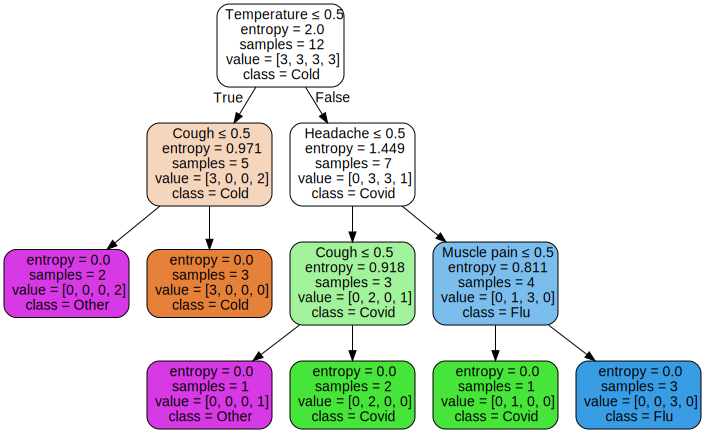

In [5]:
# Export the tree data
# TO DO: Apply the parameter that defines how to paint the nodes to indicate majority class for classification
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=["Temperature", "Sore throat", "Cough", "Headache", "Muscle pain"],
                     class_names=clf.classes_, rounded=True,filled=True,
                     special_characters=True)  #________TO DO__________
# Create the graphviz graph
graph = graphviz.Source(dot_data)
# Display the DT graph
graph

Observe the decision tree generated and answer the following questions:


*   What is the most likely diagnose if the patient only has a temperature, a headache and muscle pain?
*   What is the most likely diagnose if the patient only has a temperature and coughs?
*   What is the most likely diagnose if the patient only coughs and has a sore throat?
*   What is the most likely diagnose if the patient only has a temperature?


<font color='red'>1.Temperature > 0.5 (High Temperature)
Muscle Pain > 0.5 (Present)
Headache > 0.5 (Present) → Predict: Flu


<font color='red'>2.Temperature > 0.5 (High Temperature)
Muscle Pain <= 0.5 (Absent)
Cough > 0.5 (Present) → Predict: Covid

<font color='red'>3.Although "Sore throat" is part of our dataset, the current DT doesn't utilize it for making predictions. This means that whether a patient has a sore throat or not doesn't influence the diagnosis in this model.

<font color='red'>Temperature <= 0.5 (Low Temperature)
Cough > 0.5 (Present) → Predict: Cold

<font color='red'>4.Temperature > 0.5 (High Temperature)
Muscle Pain <= 0.5 (Absent)
Cough <= 0.5 (Absent) → Predict: Other

After you answer, use the DT classifier defined to answer these questions again and check if you were correct.

In [6]:
# TO DO: Define the parameters for each prediction
XTest = np.array([
    [1, 0, 0, 1, 1],  # Patient 1: Temperature, Headache, Muscle Pain
    [1, 0, 1, 0, 0],  # Patient 2: Temperature, Cough
    [0, 1, 1, 0, 0],  # Patient 3: Cough, Sore Throat
    [1, 0, 0, 0, 0]   # Patient 4: Only Temperature
])

# TO DO: Predict the diagnoses
clf.predict(XTest)

array(['Flu', 'Covid', 'Cold', 'Other'], dtype='<U5')

<font color='red'>All diagnoses predicted by the DT classifier align perfectly with the initial analysis that I have answered.

Now try to create the same DT but using the actual temperature of each patient. ***Do you get the same DT? Are the answers to the previous questions the same?***

|--- Temperature <= 36.90
|   |--- Cough <= 0.50
|   |   |--- class: Other
|   |--- Cough >  0.50
|   |   |--- class: Cold
|--- Temperature >  36.90
|   |--- Headache <= 0.50
|   |   |--- Cough <= 0.50
|   |   |   |--- class: Other
|   |   |--- Cough >  0.50
|   |   |   |--- class: Covid
|   |--- Headache >  0.50
|   |   |--- Muscle pain <= 0.50
|   |   |   |--- class: Covid
|   |   |--- Muscle pain >  0.50
|   |   |   |--- class: Flu



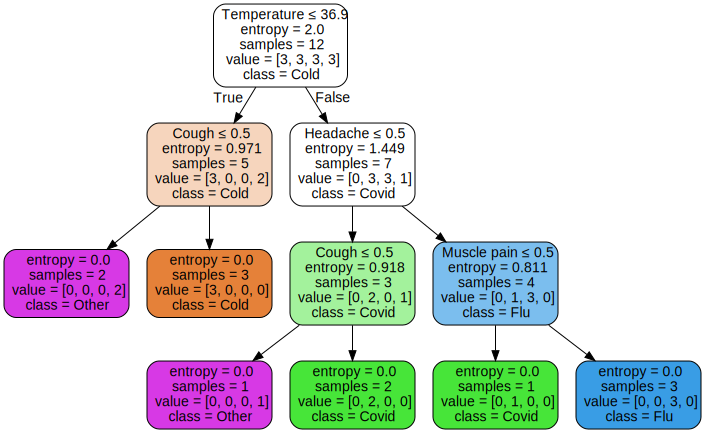

In [7]:
# Parameters of training data
XTrain = np.array([[38.6, 0, 1, 0, 0], [37.9, 0, 1, 0, 1], [37.5, 0, 1, 1, 0],\
                   [39.0, 1, 0, 1, 1], [37.2, 0, 1, 1, 1], [38.4, 0, 1, 1, 1],\
                   [36.1, 1, 1, 0, 0], [35.8, 1, 1, 1, 0], [36.4, 1, 1, 0, 0],\
                   [36.6, 0, 0, 1, 1], [37.3, 1, 0, 0, 0], [35.7, 1, 0, 1, 0]])

# Ground truth of training data
yTrain = np.array(["Covid", "Covid", "Covid", "Flu", "Flu", "Flu", "Cold", "Cold", "Cold", "Other", "Other", "Other"])

# TO DO: Change the criterion to information gain
clf = tree.DecisionTreeClassifier(criterion='entropy') #_________TO DO__________
clf = clf.fit(XTrain, yTrain)

# Export and print the DT
r = tree.export_text(clf, feature_names=["Temperature", "Sore throat", "Cough", "Headache", "Muscle pain"])
print(r)
# Export the tree data
# TO DO: Apply the parameter that defines how to paint the nodes to indicate majority class for classification
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=["Temperature", "Sore throat", "Cough", "Headache", "Muscle pain"],
                     class_names=clf.classes_, rounded=True,filled=True,
                     special_characters=True)  #________TO DO__________
# Create the graphviz graph
graph = graphviz.Source(dot_data)
# Display the DT graph
graph

Now test your classifier with these data. ***What results do you get?***

In [8]:
# Define the parameters for each prediction
XTest = [[38.1, 0, 0, 1, 1], [37.8, 0, 1, 0, 0], [36.3, 1, 1, 0, 0], [37.9, 0, 0, 0, 0]]

# TO DO: Predict the diagnoses
clf.predict(XTest)

array(['Flu', 'Covid', 'Cold', 'Other'], dtype='<U5')

<font color='red'>All four diagnoses predicted by the updated DT classifier accurately match the initial analysis. This indicates that, despite adding the temperature values, the classifier still made accurate predictions for the given scenarios.




---



Now we are going to work with a larger dataset. The dataset is a public dataset coming from Cleveland database that you can download from the subject platform in the Moodle.

It contains 14 columns (one per attribute). The attributes are related to the patient health state. They are the following:


1.	age
2.	sex
3.	chest pain type (4 values)
4.	resting blood pressure
5.	serum cholestoral in mg/dl
6.	fasting blood sugar > 120 mg/dl
7.	resting electrocardiographic results (values 0,1,2)
8.	maximum heart rate achieved
9.	exercise induced angina
10.	oldpeak = ST depression induced by exercise relative to rest
11.	the slope of the peak exercise ST segment
12.	number of major vessels (0-3) colored by flourosopy
13.	thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14.	target ( 1=ill, 0=helathy)


The dataset contains the information of 303 patients.

First, run the following cell and load the "heart.csv" file from your disk.


In [9]:
# TO DO: load "heart.csv" file from disk
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (5).csv


Run this cell to load the data and generate a training and testing dataset that will be later used to generate the classsifier.

In [36]:
# Sort the dataset in a Pandas Dataframe
df = pd.read_csv(io.BytesIO(uploaded['heart (5).csv']))

# Divide the dataset in 70% training and 30% testing
df_train, df_test = train_test_split(df, test_size=0.3)

# Extract the names of the atributes of the dataset
X_list = df_train.columns.values.tolist()
# Extract the name of the ground truth atribute of the dataset
y_list = X_list.pop()

# Extract the parameters and ground truth of the training data
XTrain = df_train[X_list]
yTrain = df_train[y_list]
# Extract the parameters and ground truth of the testing data
XTest = df_test[X_list]
yTest = df_test[y_list]

Now that we have the sorted data, create a new Decision Tree using entropy criterion for this data and answer the following questions.

* **Which is the % of correct predictions for the training and testing data? Round the value to 2 decimals.**

* **Which is the depth of the generated DT?**

* **How many leaf nodes does it have?**

In [37]:
# TO DO: Create and fit DT classifier
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(XTrain, yTrain)

# Check predictions for training and testing data
y_train_pred = clf.predict(XTrain)
y_test_pred = clf.predict(XTest)
# Calculate accuracy for training and testing data
train_accuracy = (100 / len(y_train_pred ) * np.count_nonzero(yTrain ==y_train_pred ))
print(f"Training Accuracy: {train_accuracy: .2f}%")
test_accuracy = (100 / len(y_test_pred) * np.count_nonzero(yTest == y_test_pred))
print(f"Testing Accuracy: {test_accuracy: .2f}%")

# Check depth and number of leaf nodes of generated DT
tree_depth = clf.get_depth()
num_leaf_nodes = clf.get_n_leaves()

# Print the results
print(f"\nDepth of the Decision Tree: {tree_depth}")
print(f"Number of Leaf Nodes: {num_leaf_nodes}")

Training Accuracy:  100.00%
Testing Accuracy:  74.73%

Depth of the Decision Tree: 10
Number of Leaf Nodes: 35


<font color='red'>The DT model achieved a Training Accuracy of 100.00% and a Testing Accuracy of 74.43%. The depth of the generated DT is 10 and it has 35 leaf nodes.

Plot the DT graph (colored) and analyze it.

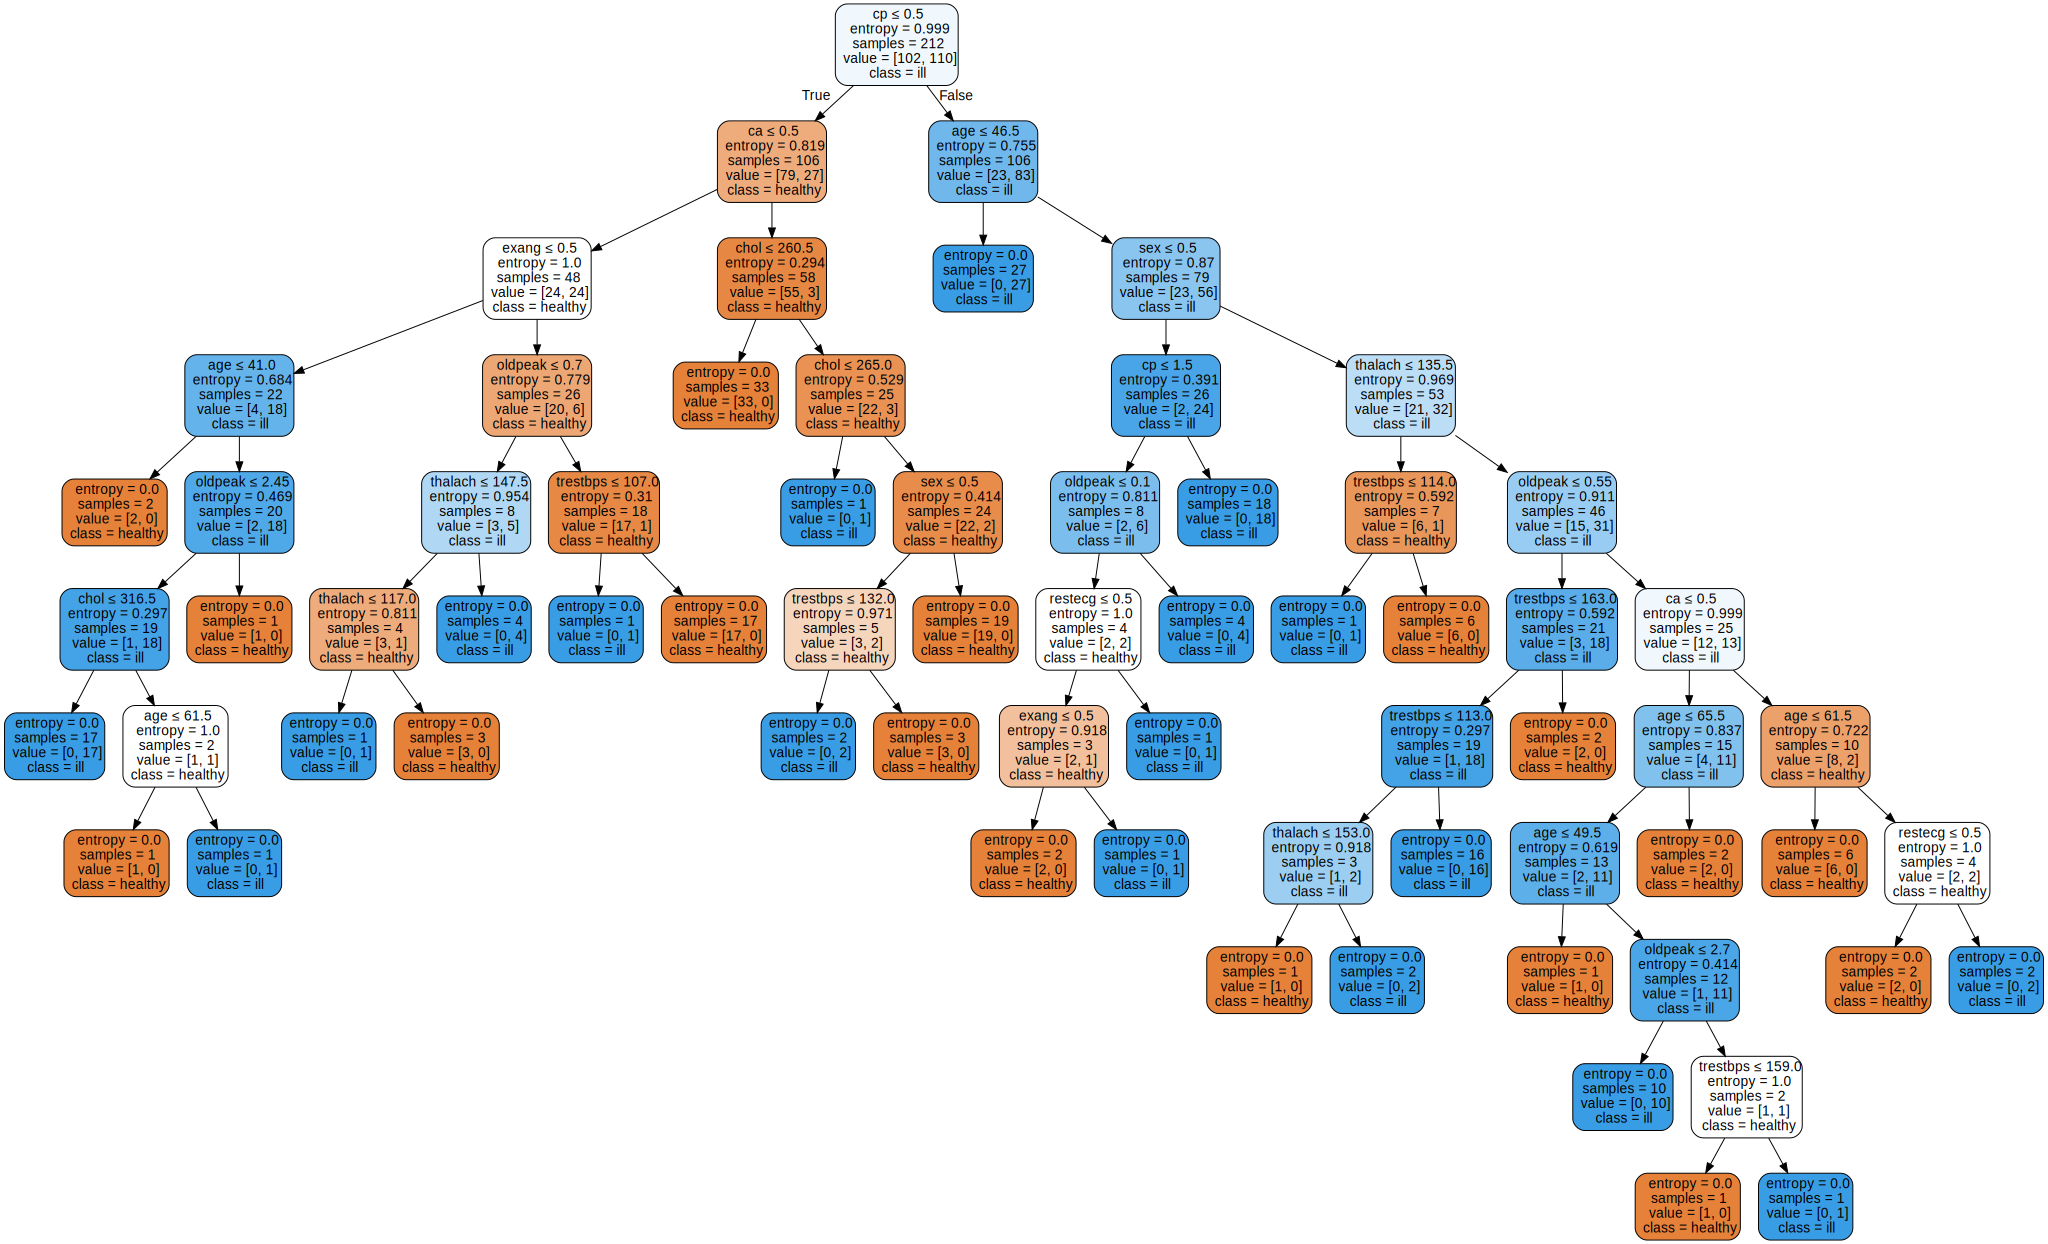

In [39]:
# TO DO: Plot the resulting tree
class_names = ["healthy","ill"]
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=X_list,
                     class_names=class_names,  # Use the converted class names
                     filled=True,  # Apply the filled parameter to color the nodes
                     rounded=True,
                     special_characters=True)

# Create the graphviz graph
graph = graphviz.Source(dot_data)

# Display the DT graph
graph


As we've just seen, the DT generated is quite deep and wide. This is because DT tend to overfit the data. To avoid this, we can change the maximum depth and minimum number of leaf nodes allowed. Try different values for each parameter and find the best result. **Which combination works best?**

***Hint:* You might want to use a loop to try the different combinations**

In [40]:
# TO DO: Create DT Classifiers with different maximum depths and minimum number of lead nodes allowed

# Define the range of values for max_depth and min_samples_leaf
max_depth_values = range(1, 20)
min_samples_leaf_values = range(2, 20)

selected_max_depth = None
selected_min_samples_leaf = None
selected_train_accuracy = 0
selected_test_accuracy = 0

# Loop through different combinations of max_depth and min_samples_leaf
for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:
        # Create and fit the Decision Tree classifier
        clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf = clf.fit(XTrain, yTrain)

        # Check predictions for training data
        train_res = clf.predict(XTrain)
        train_accuracy = (100 / len(train_res) * np.count_nonzero(yTrain == train_res))

        # Evaluate the classifier on the testing data
        test_res = clf.predict(XTest)
        test_accuracy = (100 / len(test_res) * np.count_nonzero(yTest == test_res))

        # Update the selected parameters if the current test accuracy is higher
        if test_accuracy > selected_test_accuracy:
            selected_test_accuracy = test_accuracy
            selected_train_accuracy = train_accuracy
            selected_max_depth = max_depth
            selected_min_samples_leaf = min_samples_leaf

# Output the best parameters and accuracies
print(f"Selected max_depth: {selected_max_depth}")
print(f"Selected min_samples_leaf: {selected_min_samples_leaf}")
print(f"Selected Training Accuracy: {selected_train_accuracy:.2f}%")
print(f"Selected Testing Accuracy: {selected_test_accuracy:.2f}%")


Selected max_depth: 4
Selected min_samples_leaf: 3
Selected Training Accuracy: 86.32%
Selected Testing Accuracy: 81.32%


<font color='red'> By adjusting the max_depth and min_samples_leaf, we can control the complexity of the DT to prevent overfitting. The optimal parameters found were:

<font color='red'>Maximum Depth: 4

<font color='red'>Minimum Samples per Leaf: 3

<font color='red'>Training Accuracy: 86.32%

<font color='red'>Testing Accuracy: 81.32%

<font color='red'>This approach helps create a model that generalizes better to new data, avoiding the pitfalls of overfitting.

Plot the best DT you found and compare it with the previous one. ***Is it easier to follow?***

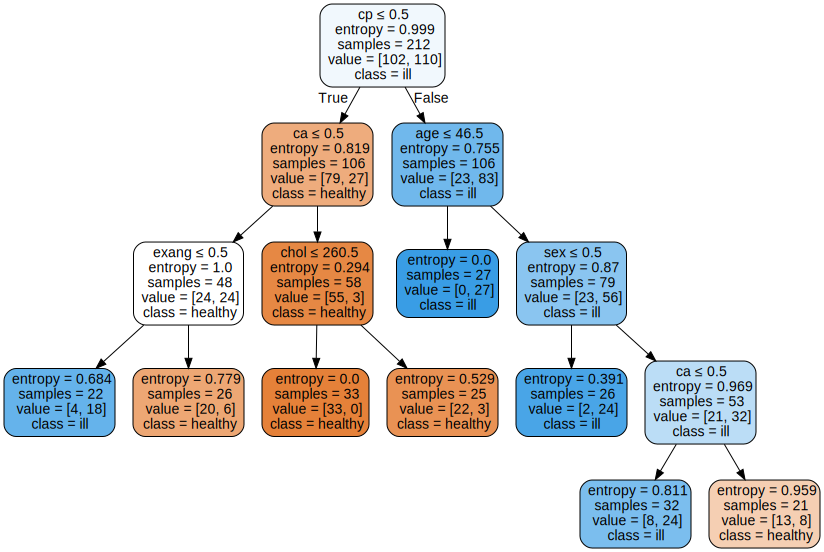

In [41]:
# TO DO: Plot the resulting tree
class_names = ["healthy","ill"]
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=X_list,
                     class_names=class_names,  # Use the converted class names
                     filled=True,  # Apply the filled parameter to color the nodes
                     rounded=True,
                     special_characters=True)

# Create the graphviz graph
graph = graphviz.Source(dot_data)

# Display the DT graph
graph


<font color='red'> Yes, The best DT is simpler and easier to follow compared to the previous one, as it reduces overfitting and results in a more interpretable model.

## **2. ENSEMBLE TREES**

### **Random Forest (RF) and eXtreme Gradient Boosting (XGBoost)**

---



Tree ensembles combine several decision trees to produce better predictive performance than utilizing a single decision tree. In this section we will experience with two approaches: Random Forest (RF) and eXtreme Gradient Boosting (XGBoost).

**Random forest** is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression. Random Forest is suitable for situations when we have a large dataset, and interpretability is not a major concern. Decision trees are much easier to interpret and understand. Since a random forest combines multiple decision trees, it becomes more difficult to interpret.



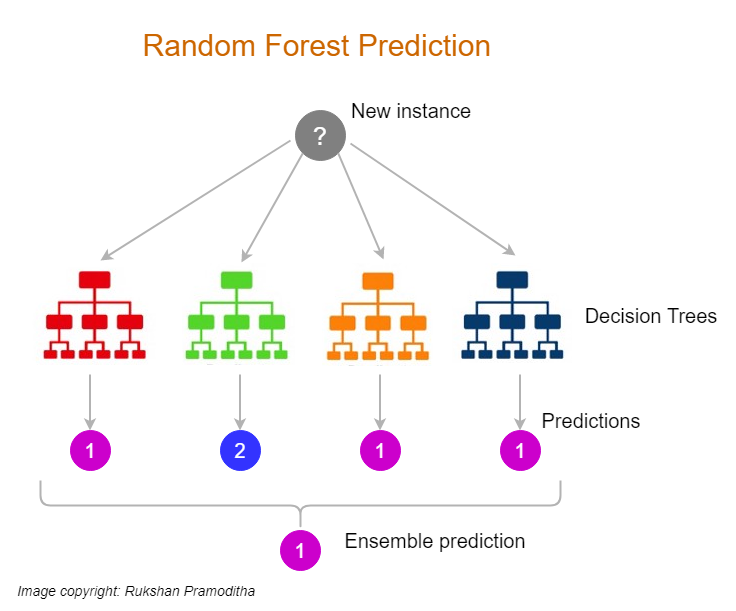

**XGBoost**, eXtreme Gradient Boosting, is a distributed gradient-boosted decision tree (GBDT) machine learning library. XGBoost uses a technique called gradient boosting, where trees are built sequentially, with each new tree trying to correct the errors made by the previous trees.

Trees are built one after the other, where each subsequent tree focuses on the instances that were misclassified by the previous trees. This makes the model progressively stronger. Each tree's prediction is given a weight, and the final prediction is a weighted sum of all the tree predictions.


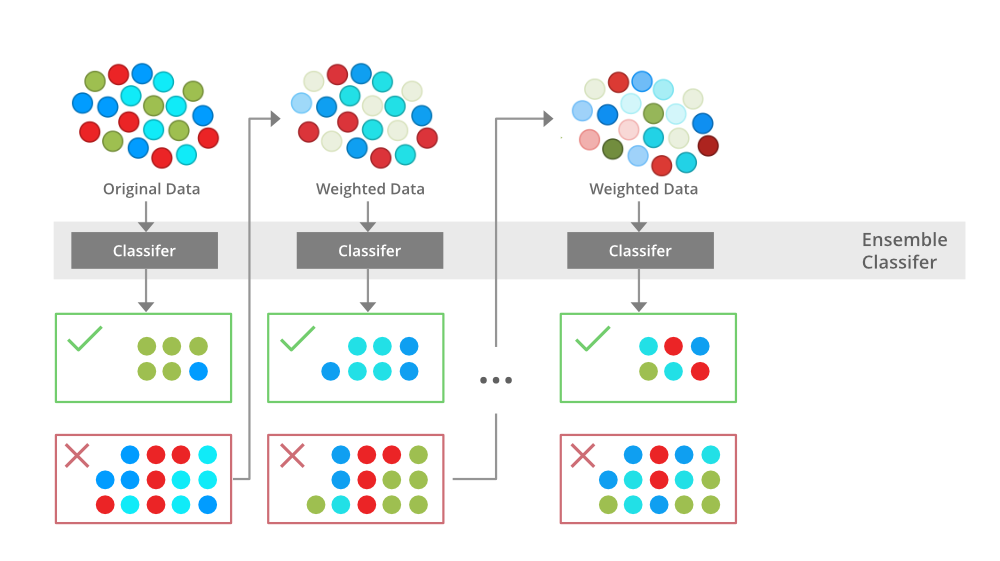

<a name="toc_40291_1"></a>
### Problem statement

In this part we are going to see how **tree ensembles** work with a simple example, especifically the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) from the scikit-learn library, and the [XGBClassifier](https://xgboost.readthedocs.io/en/stable/parameter.html) from a library called `XGBoost`.

In [42]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

<a name="toc_40291_11"></a>
### **Random Forest**

In this section, we are now going to see how this algorithm works with a simple example, using the Python library `scikit-learn`, especifically the ["RandomForestClassifier"](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) function.



In [49]:
# Fit the classifier
clf = RandomForestClassifier()
clf = clf.fit(XTrain, yTrain)

# Check predictions for training data
res = clf.predict(XTrain)
perc = round(100/len(res)*np.count_nonzero(yTrain == res),2)
print("Train result % = "+str(perc))

# Check predictions for testing data
res = clf.predict(XTest)
perc = round(100/len(res)*np.count_nonzero(yTest == res),2)
print("Test result % = "+str(perc))

Train result % = 100.0
Test result % = 83.52


In the code cell below, change the maximum depth and the minimum number of samples required for a leaf node, as we did with the DT of the previous lab. Try different values for each parameter and find the best result. **Which combination works best?**

***Hint:* You might want to use a loop to try the different combinations**

In [52]:
# TO DO: Create Random Forest Classifiers with different maximum depths and minimum number of lead nodes allowed

# Define the range of values for max_depth and min_samples_leaf
max_depth_values = range(1, 11)
min_samples_leaf_values = range(1, 11)

# Initialize variables to store the selected parameters and corresponding accuracy
selected_max_depth = None
selected_min_samples_leaf = None
selected_test_accuracy = 0
selected_train_accuracy = 0
# Loop through different combinations of max_depth and min_samples_leaf
for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:
        # Create and fit the Random Forest classifier
        clf = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf = clf.fit(XTrain, yTrain)
        # Check predictions for training data
        train_res = clf.predict(XTrain)
        train_accuracy = (100 / len(train_res) * np.count_nonzero(yTrain == train_res))
        # Check predictions for testing data
        test_res = clf.predict(XTest)
        test_accuracy = (100 / len(test_res) * np.count_nonzero(yTest == test_res))

        # Update the selected parameters if the current accuracy is higher
        if test_accuracy> selected_test_accuracy:
            selected_test_accuracy = test_accuracy
            selected_train_accuracy = train_accuracy
            selected_max_depth = max_depth
            selected_min_samples_leaf = min_samples_leaf

# Output the selected parameters and accuracy
print(f"Selected max_depth: {selected_max_depth}")
print(f"Selected min_samples_leaf: {selected_min_samples_leaf}")
print(f"Selected Training Accuracy: {selected_train_accuracy:.2f}%")
print(f"Selected Testing Accuracy: {selected_test_accuracy:.2f}%")


Selected max_depth: 3
Selected min_samples_leaf: 6
Selected Training Accuracy: 89.62%
Selected Testing Accuracy: 85.71%


<a name="toc_40291_11"></a>
### **XGBoost**

Like in the previous section, implement an XGBoost ensemble and try different parametrizations of maximum depth. **How do these results compare with the RF?**

In [55]:
# Initialize the XGBoost classifier
clf = XGBClassifier()

# Fit the classifier to the training data
clf.fit(XTrain, yTrain)

# Check predictions for training data
res_train = clf.predict(XTrain)
perc_train = round(100 / len(res_train) * np.count_nonzero(yTrain == res_train),2)
print("Train result % = " + str(perc_train))

# Check predictions for testing data
res_test = clf.predict(XTest)
perc_test = round(100 / len(res_test) * np.count_nonzero(yTest == res_test),2)
print("Test result % = " + str(perc_test))


Train result % = 100.0
Test result % = 79.12


In [57]:
#TO DO: Create an XGBoost ensemble classifiers with different maximum depths

# Define the range of values for max_depth and min_child_weight
max_depth_values = range(1, 11)
min_child_weight_values = range(1, 11)

# Initialize variables to store the selected parameters and corresponding accuracy
selected_max_depth = None
selected_min_child_weight = None
selected_accuracy = 0

# Loop through different combinations of max_depth and min_child_weight
for max_depth in max_depth_values:
    for min_child_weight in min_child_weight_values:
        # Create and fit the XGBoost classifier
        clf = XGBClassifier(max_depth=max_depth, min_child_weight=min_child_weight)
        clf = clf.fit(XTrain, yTrain)
        # Check predictions for training data
        train_res = clf.predict(XTrain)
        train_accuracy = (100 / len(train_res) * np.count_nonzero(yTrain == train_res))
        # Check predictions for testing data
        res = clf.predict(XTest)
        perc = (100 / len(res) * np.count_nonzero(yTest == res))

        # Update the selected parameters if the current accuracy is higher
        if perc > selected_accuracy:
            selected_test_accuracy = test_accuracy
            selected_train_accuracy = train_accuracy
            selected_max_depth = max_depth
            selected_min_child_weight = min_child_weight

# Output the selected parameters and accuracy
print(f"Selected max_depth: {selected_max_depth}")
print(f"Selected min_child_weight: {selected_min_child_weight}")
print(f"Selected Training Accuracy: {selected_train_accuracy:.2f}%")
print(f"Selected Testing Accuracy: {selected_test_accuracy:.2f}%")

Selected max_depth: 10
Selected min_child_weight: 10
Selected Training Accuracy: 89.15%
Selected Testing Accuracy: 82.42%


Looking at the results that you get for the **training** set and the **validation** set, how do both methods compare in terms of **generalization**?

<font color='red'>Both models indicate some overfitting given their perfect training accuracy, they need further hyperparameter tuning. After tuning, both models showed a decrease in training accuracy (Random Forest: 89.62%, XGBoost: 89.15%), so we can say that the models are becoming less tailored to the training data and potentially improving generalization.

<font color='red'>Random Forest achieved a higher testing accuracy (85.71%) compared to XGBoost (82.42%). This indicates that Random Forest generalizes better to unseen data in our scenario. The chosen hyperparameters effectively balance complexity and performance. With a shallower depth and higher minimum samples per leaf, the trees are simpler and less prone to overfitting, which means better generalization.

<font color='red'>XGBoost, while strong, didn't outperform Random Forest here. The hyperparameters might have made it too complex, and do not generalize as effectively.